In [193]:

import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [194]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots()
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [195]:
figdir = '../figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [241]:
step_size = '3'

In [242]:
resultsdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_eigenvector_centrality_1_mexican_hat_5/level_5'

In [243]:
resultsdir = resultsdir + '_' + step_size

## find maximum level computed for optimization

In [244]:
max_level = int(os.path.basename(os.path.splitext(resultsdir)[0]).split('_')[1])

## compile to one dataframe

In [245]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [246]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

## create column with max level computed

In [247]:
full_data['max_level'] = max_level - full_data.isnull().sum(axis=1)

In [248]:
full_data.head()

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_2,level_3,level_4,level_5,rank,iteration,cond,max_level
0,0,0.273333,0.025900,0,5,1.000000,NaN,NaN,NaN,NaN,NaN,0.989433,0,intact,0
1,0,0.313333,0.033389,0,5,0.559798,0.440202,NaN,NaN,NaN,NaN,0.988744,0,intact,1
2,0,0.250000,0.040756,0,5,0.330926,0.338149,0.330926,NaN,NaN,NaN,0.985878,0,intact,2
3,0,0.240000,0.056700,0,5,0.250002,0.249993,0.250002,0.250002,NaN,NaN,0.982078,0,intact,3
4,0,0.213333,0.055700,0,5,0.200000,0.200000,0.200000,0.200000,0.2,NaN,0.979378,0,intact,4


In [234]:
melted_temp_df = pd.DataFrame()
melted_temp_df['max_level'] = full_data['max_level']
melted_temp_df['accuracy'] = full_data['accuracy']
melted_temp_df['cond'] = full_data['cond']
melted_temp_df['1 - error'] = 1-full_data['error']

In [235]:
melted_temp_df.head()

,max_level,accuracy,cond,1 - error
0,0,0.25,intact,0.976767
1,1,0.19,intact,0.967678
2,2,0.23,intact,0.962122
3,3,0.22,intact,0.957333
4,4,0.21,intact,0.952856


In [236]:
outfile = '/Users/lucyowen/Desktop/timecorr_figs/' + 'accuracy_eps=1e-' + step_size

In [237]:
outfile


'/Users/lucyowen/Desktop/timecorr_figs/accuracy_eps=1e-5'

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

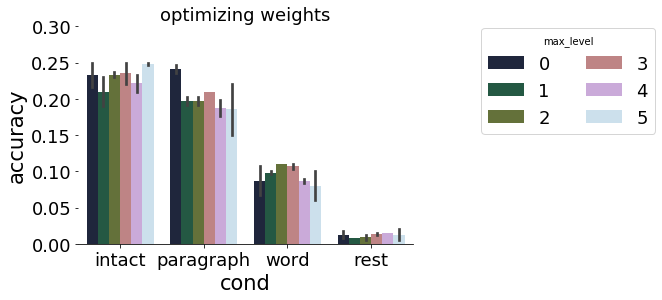

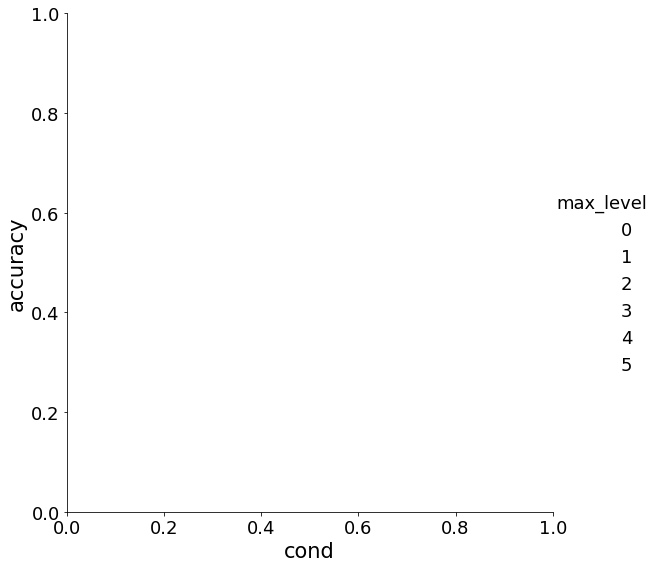

In [238]:
plt.clf()
grouped_barplot(melted_temp_df, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.3, title='optimizing weights', outfile = outfile)

In [239]:
outfile = '/Users/lucyowen/Desktop/timecorr_figs/' + 'error_eps=1e-' + step_size

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


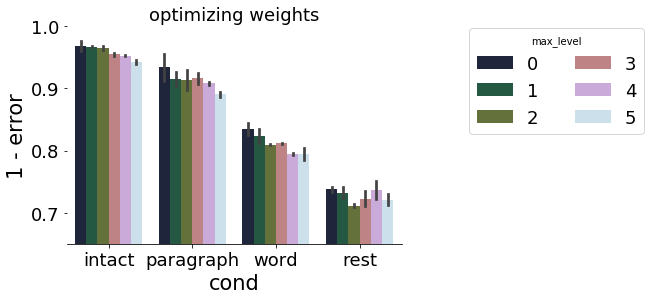

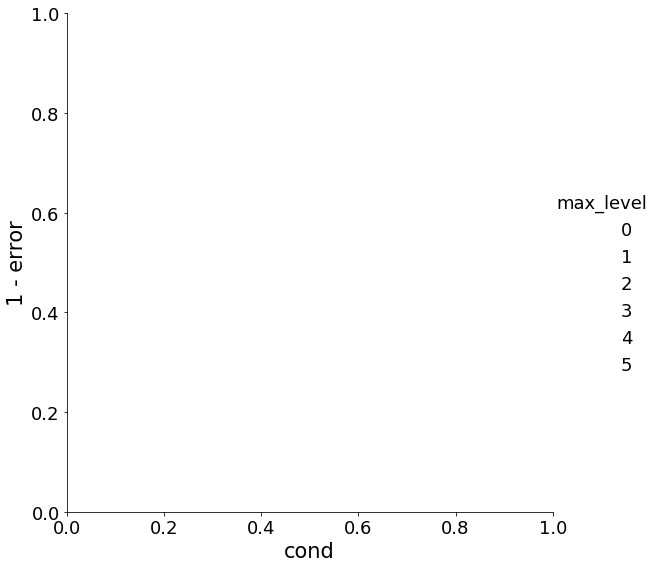

In [240]:
grouped_barplot(melted_temp_df, 'cond', '1 - error', 'max_level', ymin=.65, ymax=1, title='optimizing weights', outfile = outfile)